In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# extract one frame from video
video_path = 'asset/sample.mp4'
frame_number = 30
cap = cv.VideoCapture(video_path)
cap.set(cv.CAP_PROP_POS_FRAMES, frame_number)
ret, frame = cap.read()
cap.release()
cv.imwrite('asset/sample_frame.jpg', frame)

True

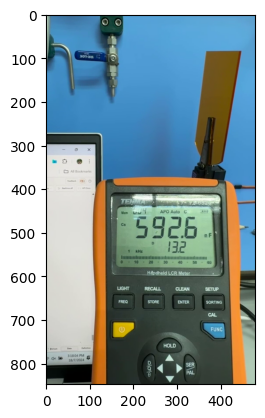

In [3]:
plt.imshow(cv.cvtColor(frame, cv.COLOR_BGR2RGB))
plt.show()

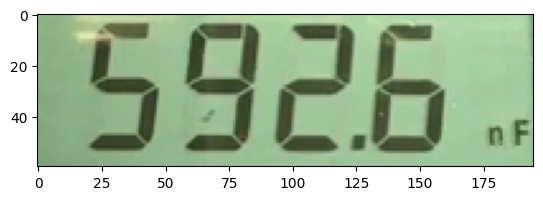

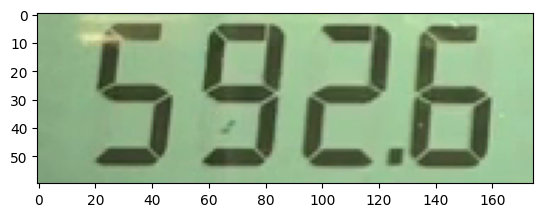

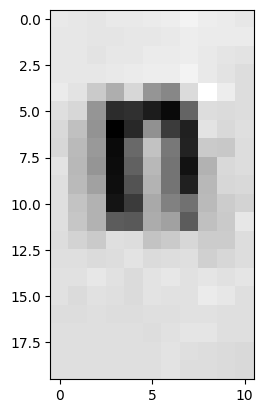

In [4]:
# crop the image
cropped = frame[460:520, 185:380]
number_region = cropped[:, 0:175]
unit_region = cropped[40:60, 175:186]
unit_region = cv.cvtColor(unit_region, cv.COLOR_BGR2GRAY)
plt.imshow(cropped, cmap='gray')
plt.show()
plt.imshow(number_region, cmap='gray')
plt.show()
plt.imshow(unit_region, cmap='gray')
plt.show()

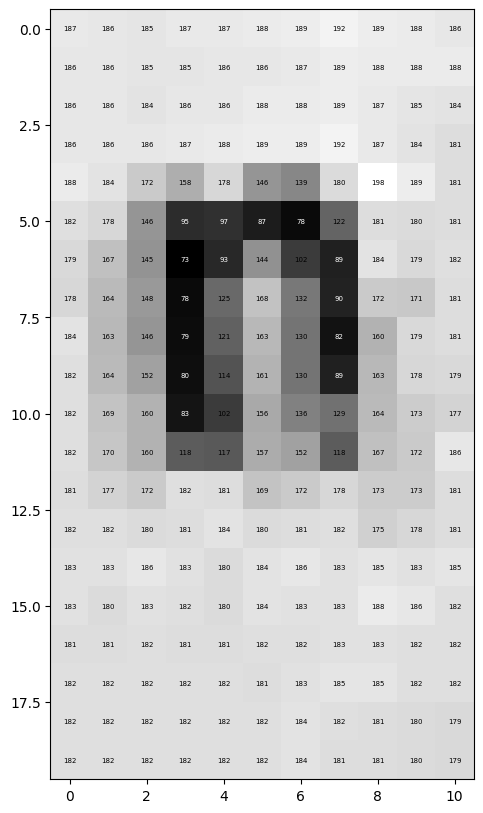

In [5]:
def plot_matrix_with_values(arr):
    plt.figure(figsize=(20, 10))
    # Display the image
    plt.imshow(arr, cmap='gray')
    # Get the dimensions of the array
    height, width = arr.shape
    # Iterate over each pixel
    for y in range(height):
        for x in range(width):
            # Choose text color for better readability
            text_color = 'white' if arr[y, x] < arr.max() / 2 else 'black'
            # Annotate the pixel value on the plot
            plt.text(x, y, f'{arr[y, x]}', color=text_color, ha='center', va='center', fontsize=5)
    plt.show()

# Plot for unit_region
plot_matrix_with_values(unit_region)

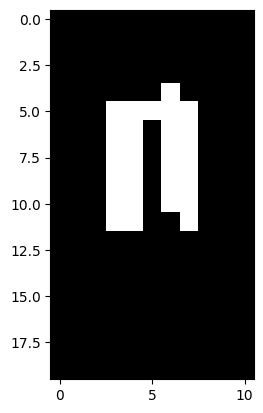

In [6]:
unit_thresh = cv.threshold(unit_region, 0, 255, cv.THRESH_BINARY_INV | cv.THRESH_OTSU)[1]
plt.imshow(unit_thresh, cmap='gray')
plt.show()

In [7]:
row_sum = np.sum(unit_thresh, axis=1)
first_non_zero = np.argmax(row_sum > 0)
last_non_zero = len(row_sum) - np.argmax(row_sum[::-1] > 0)
print(row_sum)
print(first_non_zero)
print(last_non_zero)

[   0    0    0    0  255 1275 1020 1020 1020 1020 1020  765    0    0
    0    0    0    0    0    0]
4
12


In [8]:
def extract_features(binary_img):
    # Find contours
    contours, _ = cv.findContours(binary_img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    # Assume the largest contour is the letter
    contour = max(contours, key=cv.contourArea)
    # Get bounding box
    x, y, w, h = cv.boundingRect(contour)
    # Calculate aspect ratio
    aspect_ratio = float(w) / h
    return aspect_ratio, (x, y, w, h)

def classify_letter(aspect_ratio):
    # Classification rule based on aspect ratio
    if aspect_ratio > 0.78:
        return "u"
    else:
        return "n"
    
aspect_ratio, bounding_box = extract_features(unit_thresh)
letter = classify_letter(aspect_ratio)
print(aspect_ratio)
print(bounding_box)
print(letter)



0.625
(3, 4, 5, 8)
n


number='592.6'


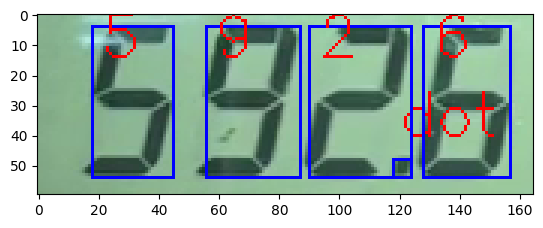

In [9]:
from ssocr_module import SSOCR

ssocr = SSOCR()
number, digit_img = ssocr.run_digit(number_region)
print(f'{number=}')
plt.imshow(cv.cvtColor(digit_img, cv.COLOR_BGR2RGB))
plt.show()